In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import argparse

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:

path = "/content/drive/MyDrive/Pradeep_redpine/Documents/"
master_data= pd.read_csv(path + 'master_data.csv')

master_data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad,ae,af,ag,ah,ai,aj,ak,al,am,an,ao,ap,aq,ar,as,label
0,0.759328,0.051102,0.050447,0.691667,0.067299,0.932701,0.066436,0.000863,0.148333,0.616667,0.640000,0.023333,0.230000,0.399393,0.195348,0.989070,0.214458,0.891566,0.925301,0.033735,0.066667,0.268333,0.390000,0.436667,-0.782787,-0.091628,-0.874415,0.028333,0.103333,0.096386,0.387952,0.563855,0.631325,0.040964,0.149398,0.055422,0.238554,-0.327711,-0.293976,5.419922,0.015931,4.815900,0.009824,8.935547,0.003691,109
1,0.901039,0.236481,0.234768,0.666667,0.262454,0.737546,0.260552,0.001901,0.156667,0.493333,0.513333,0.020000,0.263333,0.390981,0.173873,1.542268,0.235000,0.740000,0.770000,0.030000,0.071667,0.295000,0.390000,0.445000,-0.772208,-0.045414,-0.817622,0.033333,0.113333,0.107500,0.442500,0.585000,0.667500,0.050000,0.170000,0.057500,0.272500,-0.155000,-0.102500,3.881836,0.031337,5.712891,0.015067,7.910156,0.010668,109
2,0.881105,0.172121,0.164977,0.665000,0.195347,0.804653,0.187238,0.008109,0.151667,0.578333,0.613333,0.035000,0.246667,0.378558,0.172132,3.331376,0.228070,0.869674,0.922306,0.052632,0.070000,0.191667,0.221667,0.285000,-0.790663,0.098534,-0.692129,0.031667,0.111667,0.105263,0.288221,0.333333,0.428571,0.047619,0.167920,0.057644,0.120301,-0.536341,-0.493734,5.712891,0.017359,7.910156,0.013072,9.741211,0.004527,109
3,0.849716,0.135928,0.135301,0.683333,0.159969,0.840031,0.159231,0.000738,0.150000,0.620000,0.638333,0.018333,0.253333,0.374591,0.176530,3.020625,0.219512,0.907317,0.934146,0.026829,0.066667,0.281667,0.411667,0.460000,-0.823851,-0.109789,-0.933639,0.030000,0.103333,0.097561,0.412195,0.602439,0.673171,0.043902,0.151220,0.053659,0.260976,-0.304878,-0.260976,5.566406,0.018040,7.250977,0.008889,9.301758,0.005885,109
4,0.825774,0.139097,0.128035,0.675000,0.168444,0.831556,0.155049,0.013395,0.141667,0.586667,0.625000,0.038333,0.246667,0.342140,0.171556,2.781934,0.209877,0.869136,0.925926,0.056790,0.066667,0.268333,0.386667,0.433333,-0.865143,-0.061857,-0.927000,0.028333,0.103333,0.098765,0.397531,0.572840,0.641975,0.041975,0.153086,0.056790,0.244444,-0.296296,-0.283951,5.639648,0.017666,7.324219,0.011704,9.448242,0.006146,109


In [ ]:
X=master_data.iloc[:,0:46][0:].to_numpy()

y=master_data.iloc[:,-1][0:].to_numpy()
y=y.reshape(-1,1)

len(X),len(y)

(408, 408)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285, 46)
(285, 1)
(123, 46)
(123, 1)


In [ ]:

# Installing required libraries
!pip install tensorflow
!pip install keras

In [ ]:

# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='softmax'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)


Epoch 1/50


ValueError: ignored

In [ ]:


# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 186.59188519099214
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 224.22937334009617
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 138.57914583836325
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 127.18458411246496
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 187.3377983522165
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 198.76496846302373
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 143.25429097247923
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 116.82417322454984
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 166.994219406772
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 219.76808341693675
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 136.7251584291443
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 147.70889110891784
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 155.87418572066127
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 181.414245586219
15 Parameter

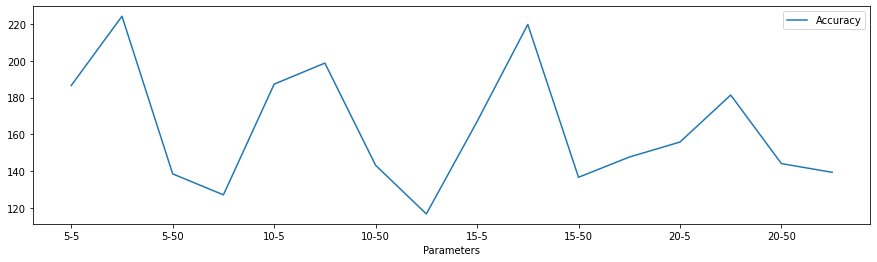

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 10, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

ValueError: ignored